### Task 1 - Data Collection
Here you will obtain the required data for the analysis. As described in the project instructions, you will perform a web scrap to obtain data from the NCDC website, import data from the John Hopkins repository, and import the provided external data.


### A - NCDC Website scrap
Website - https://covid19.ncdc.gov.ng/

In [1]:
# Write Your Code Below
# Import all libraries in this cell
import io
import requests
import numpy as np
import urllib.request
import pandas as pd
import csv
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Save the data to a DataFrame object.
df = pd.read_html('https://covid19.ncdc.gov.ng/', header=0)
df = df[0]
df.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,75324,2310,72350,664
1,FCT,21012,699,20134,179
2,Rivers,11557,826,10583,148
3,Kaduna,9381,91,9222,68
4,Plateau,9255,64,9130,61


### B - John Hopkins Data Repository
Here you will obtain data from the John Hopkins repository. Your task here involves saving the data from the GitHub repo link to DataFrame for further analysis. Find the links below. 
* Global Daily Confirmed Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv)
* Global Daily Recovered Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv)
* Global Daily Death Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv)

In [3]:
#[Write Your Code Here]

#Confirmed cases

url1 = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
download = requests.get(url1).content
df1 = pd.read_csv(io.StringIO(download.decode('utf-8')))
confirmed_cases = df1.loc[df1['Country/Region'] == 'Nigeria']

#Recovered cases

url2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
download2 = requests.get(url2).content
df2 = pd.read_csv(io.StringIO(download2.decode('utf-8')))
recovered_cases = df2.loc[df2['Country/Region'] == 'Nigeria']


#Death cases

url3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
download3 = requests.get(url3).content
df3 = pd.read_csv(io.StringIO(download3.decode('utf-8')))
death_cases = df3.loc[df3['Country/Region'] == 'Nigeria']


In [4]:
data = pd.concat([confirmed_cases, recovered_cases, death_cases], ignore_index=True)
data = data.T
data = data.drop(['Province/State', 'Country/Region', 'Lat', 'Long'])
data.reset_index(level=0, inplace= True)
data.rename(columns={'index': "Date", 0: 'confirmed cases', 1: 'recovered cases', 2: 'death cases'}, inplace=True)
data.tail()

,Date,confirmed cases,recovered cases,death cases
596,9/9/21,197773,0,2585
597,9/10/21,198239,0,2588
598,9/11/21,198786,0,2590
599,9/12/21,199151,0,2598
600,9/13/21,199538,0,2619


### C - External Data 
* Save the external data to a DataFrame
* External Data includes but not limited to: `covid_external.csv`, `Budget data.csv`, `RealGDP.csv`

In [5]:
covid_external = pd.read_csv('covid_external.csv')
budget = pd.read_csv('Budget data.csv')
gdp = pd.read_csv('RealGDP.csv')

In [6]:
#[Write Your Code Here]
covid_external.head()

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84


In [7]:
budget.head()

,states,Initial_budget (Bn),Revised_budget (Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00


In [8]:
gdp

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59
5,2019,16434552.65,16931434.89,18494114.17,19530000.00
6,2020,16740000.00,15890000.00,17820000.00,0.00


### Task 2 - View the data
Obtain basic information about the data using the `head()` and `info()` method.

In [9]:
#[Write Your Code Here]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     int64 
 2   No. of Cases (on admission)   37 non-null     int64 
 3   No. Discharged                37 non-null     int64 
 4   No. of Deaths                 37 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.6+ KB


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             601 non-null    object
 1   confirmed cases  601 non-null    object
 2   recovered cases  601 non-null    object
 3   death cases      601 non-null    object
dtypes: object(4)
memory usage: 18.9+ KB


As seen above all columns are object. So all columns in the data table needs to be converted

In [11]:
covid_external.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   states                   37 non-null     object 
 1   region                   37 non-null     object 
 2   Population               37 non-null     int64  
 3   Overall CCVI Index       37 non-null     float64
 4   Age                      37 non-null     float64
 5   Epidemiological          37 non-null     float64
 6   Fragility                37 non-null     float64
 7   Health System            37 non-null     float64
 8   Population Density       37 non-null     float64
 9   Socio-Economic           37 non-null     float64
 10   Transport Availability  37 non-null     float64
 11  Acute IHR                37 non-null     float64
dtypes: float64(9), int64(1), object(2)
memory usage: 3.6+ KB


In [12]:
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   states               37 non-null     object 
 1   Initial_budget (Bn)  37 non-null     float64
 2   Revised_budget (Bn)  37 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1016.0+ bytes


In [13]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    7 non-null      int64  
 1   Q1      7 non-null      float64
 2   Q2      7 non-null      float64
 3   Q3      7 non-null      float64
 4   Q4      7 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 408.0 bytes


Year column in the above dataframe needs to be converted to datetime

### Task 3 - Data Cleaning and Preparation
From the information obtained above, you will need to fix the data format. 
<br>
Examples: 
* Convert to appropriate data type.
* Rename the columns of the scraped data.
* Remove comma(,) in numerical data
* Extract daily data for Nigeria from the Global daily cases data

TODO A - Clean the scraped data

In [14]:
#[Write Your Code Here]
import datetime as dt

In [15]:
data['Date'] = pd.to_datetime(data['Date'])
data['confirmed cases'] = data['confirmed cases'].astype(str).astype(int)
data['recovered cases'] = data['recovered cases'].astype(int)
data['death cases'] = data['death cases'].astype(int)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             601 non-null    datetime64[ns]
 1   confirmed cases  601 non-null    int32         
 2   recovered cases  601 non-null    int32         
 3   death cases      601 non-null    int32         
dtypes: datetime64[ns](1), int32(3)
memory usage: 11.9 KB


In [16]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    7 non-null      int64  
 1   Q1      7 non-null      float64
 2   Q2      7 non-null      float64
 3   Q3      7 non-null      float64
 4   Q4      7 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 408.0 bytes


In [17]:
daily_confirmed_cases = data[["Date", 'confirmed cases']]
daily_confirmed_cases.set_index("Date", inplace=True)

TODO B - Get a Pandas DataFrame for Daily Confirmed Cases in Nigeria. Columns are Date and Cases

In [18]:
daily_recovered_cases = data[["Date", 'recovered cases']]
daily_recovered_cases.set_index("Date", inplace=True)

TODO C - Get a Pandas DataFrame for Daily Recovered Cases in Nigeria. Columns are Date and Cases

In [19]:
daily_death_cases = data[["Date", 'death cases']]
daily_death_cases.set_index("Date", inplace=True)

TODO D - Get a Pandas DataFrame for Daily Death Cases in Nigeria. Columns are Date and Cases

### Task 4 - Analysis
Here you will perform some analyses on the datasets. You are welcome to communicate findings in charts and summary. 
<br>
We have included a few TODOs to help with your analysis. However, do not let this limit your approach, feel free to include more, and be sure to support your findings with chart and summary 

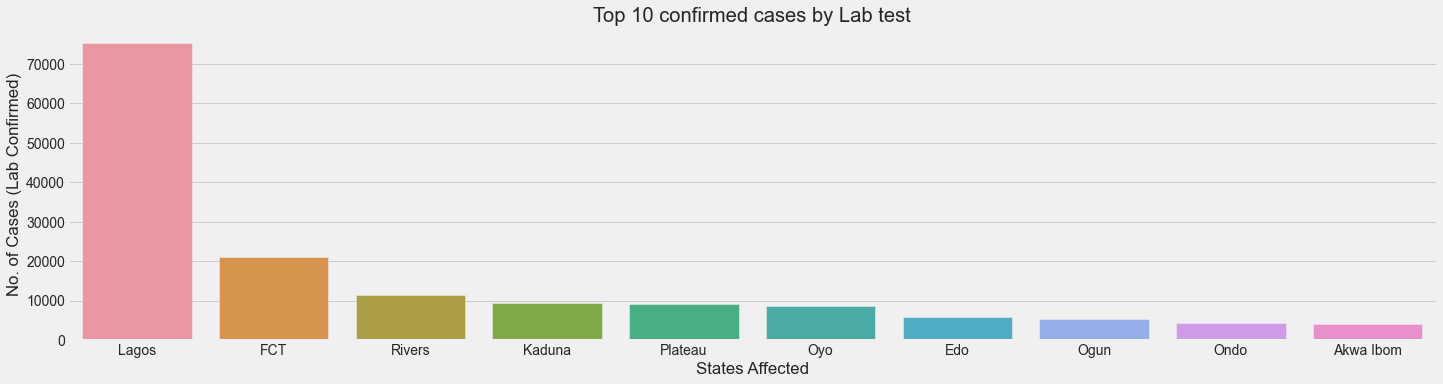

In [20]:
df1 = df.sort_values(by='No. of Cases (Lab Confirmed)', ascending=False)
df1 = df1.head(10)


p = sns.catplot(x='States Affected', y='No. of Cases (Lab Confirmed)', data = df1, kind= 'bar', aspect=4)
p.set(title='Top 10 confirmed cases by Lab test')

TODO A - Generate a plot that shows the Top 10 states in terms of Confirmed Covid cases by Laboratory test

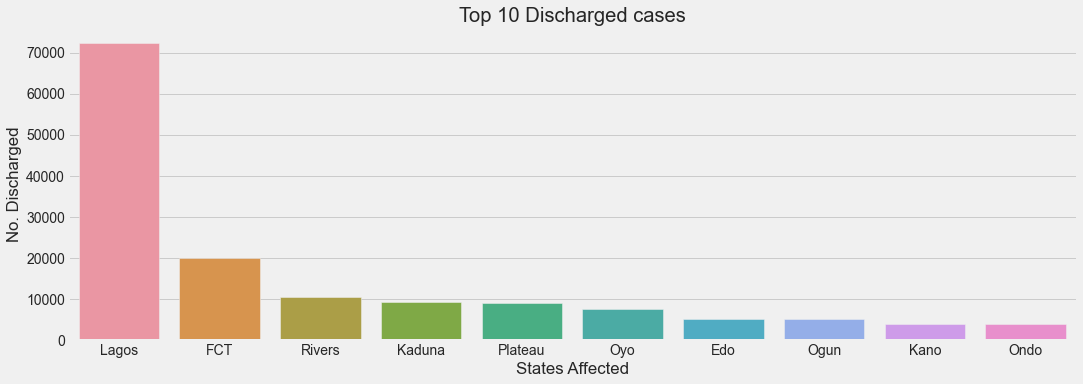

In [21]:
df2 = df.sort_values(by='No. Discharged', ascending= False)
df2 = df2.head(10)

p = sns.catplot(x='States Affected', y='No. Discharged', data = df2, kind= 'bar', aspect=3)
p.set(title='Top 10 Discharged cases')

TODO B - Generate a plot that shows the Top 10 states in terms of Discharged Covid cases. Hint - Sort the values

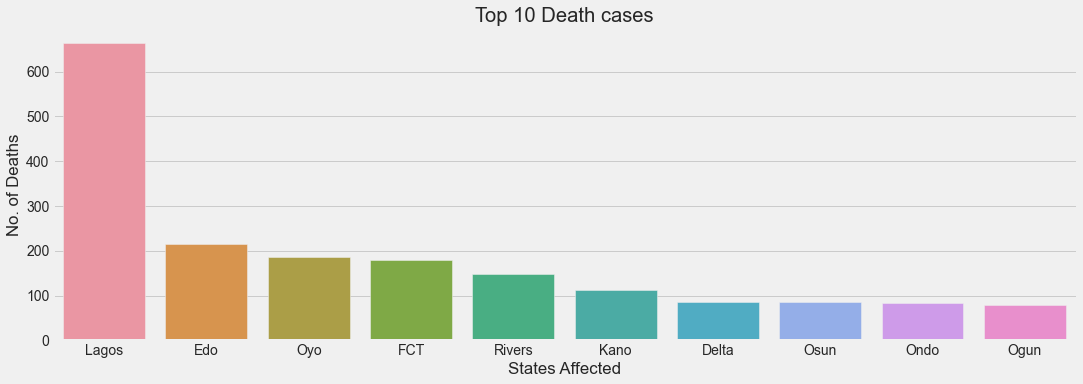

In [22]:
df3 = df.sort_values(by='No. of Deaths', ascending= False)
df3 = df3.head(10)

p = sns.catplot(x='States Affected', y='No. of Deaths', data = df3, kind= 'bar', aspect=3)
p.set(title='Top 10 Death cases')

TODO D - Plot the top 10 Death cases

In [23]:
# Working on dates
import matplotlib.dates as mdates
years = mdates.YearLocator() #every year
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter("%Y-%m")

In [24]:
def plotgraph(table_name, col):
    fig, axes = plt.subplots(figsize=(20, 7))

    sns.lineplot(data=table_name[col], label=col)

    axes.xaxis.set_major_locator(months)
    axes.xaxis.set_major_formatter(years_fmt)
    axes.xaxis.set_minor_locator(months)

    plt.xticks(rotation = 'vertical')
    plt.show()

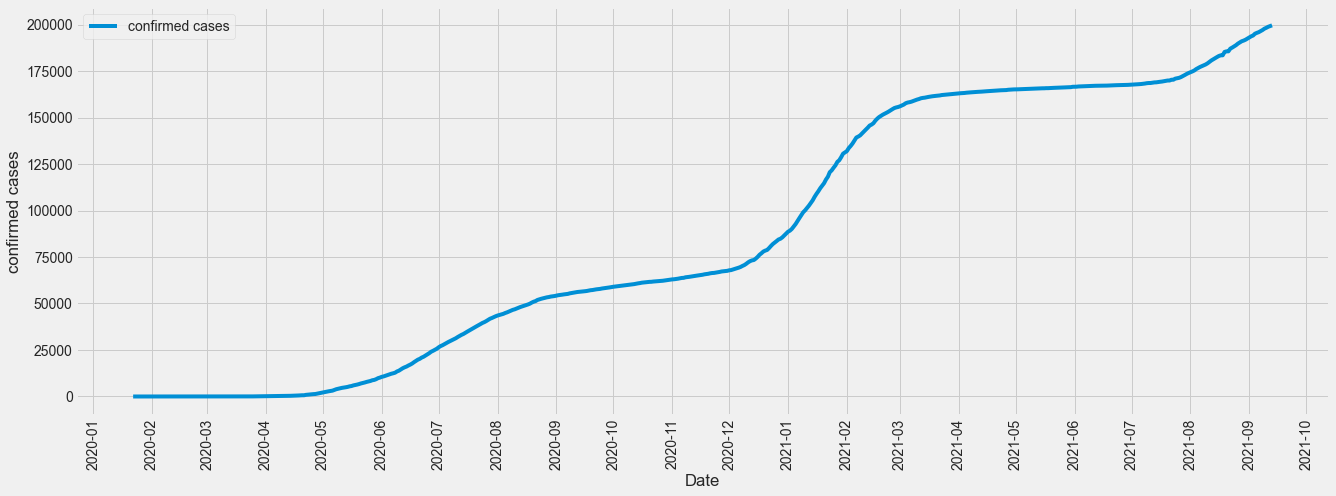

In [25]:
plotgraph(daily_confirmed_cases, 'confirmed cases')

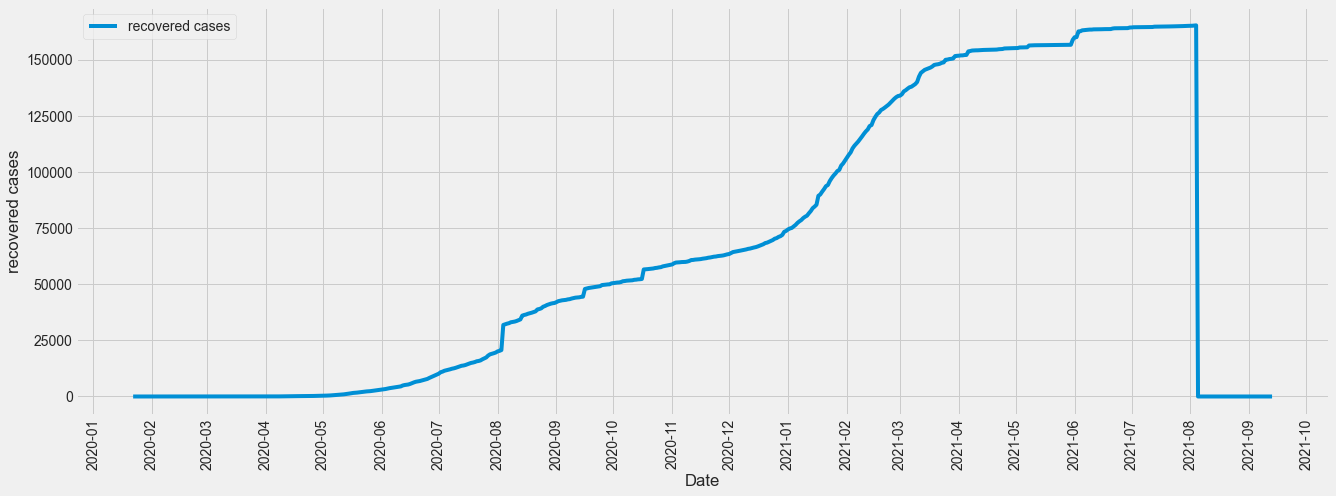

In [26]:
plotgraph(daily_recovered_cases, 'recovered cases')

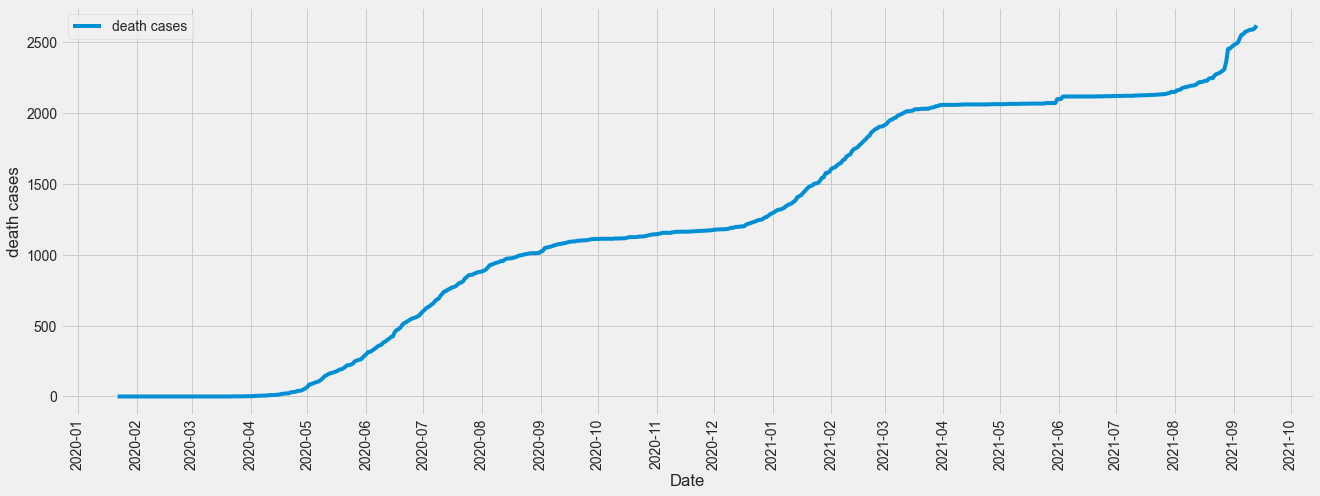

In [27]:
plotgraph(daily_death_cases, 'death cases')

TODO E - Generate a line plot for the total daily confirmed, recovered and death cases in Nigeria

In [28]:
daily_confirmed_cases['infection rate'] = daily_confirmed_cases['confirmed cases'].diff()
daily_confirmed_cases

,confirmed cases,infection rate
Date,,
2020-01-22,0,NaN
2020-01-23,0,0.0
2020-01-24,0,0.0
2020-01-25,0,0.0
2020-01-26,0,0.0
...,...,...
2021-09-09,197773,727.0
2021-09-10,198239,466.0
2021-09-11,198786,547.0


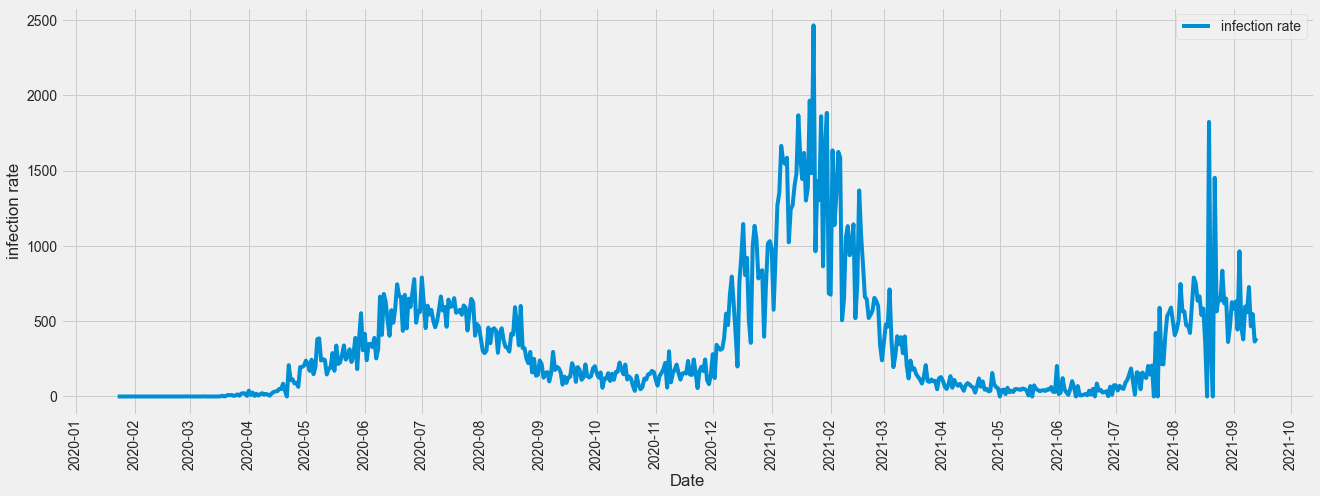

In [29]:
plotgraph(daily_confirmed_cases, 'infection rate')
#sns.lineplot(x='Date', y='infection rate', data=daily_confirmed_cases)

TODO F - 
* Determine the daily infection rate, you can use the Pandas `diff` method to find the derivate of the total cases.
* Generate a line plot for the above

In [30]:
daily_confirmed_cases.loc[daily_confirmed_cases['infection rate'] == daily_confirmed_cases['infection rate'].max()]

,confirmed cases,infection rate
Date,,
2021-01-23,120602,2464.0


The maximum infection rate for a day is 2464 on the 23rd of Jan 2021

TODO G - 
* Calculate maximum infection rate for a day (Number of new cases)
* Find the date

In [31]:
#Merge using pd.merge
df.rename(columns={'States Affected': 'states'}, inplace=True)   # rename df state column and merge on states.
new_df = pd.merge(df, covid_external, on='states')

In [32]:
new_df = new_df.sort_values(by='No. of Cases (Lab Confirmed)', ascending=False)
new_df1 = new_df.head(10)
new_df1

,states,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,Lagos,75324,2310,72350,664,South West,13992000,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93
1,FCT,21012,699,20134,179,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
2,Rivers,11557,826,10583,148,South South,7763000,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00
3,Kaduna,9381,91,9222,68,North West,9227000,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86
4,Plateau,9255,64,9130,61,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
5,Oyo,8571,734,7650,187,South West,8737000,0.2,0.7,0.8,0.2,0.8,0.6,0.2,0.3,1.06
6,Edo,6008,571,5222,215,South South,4705000,0.1,0.9,0.8,0.1,0.1,0.5,0.4,0.3,1.09
7,Ogun,5336,64,5193,79,South West,5878000,0.3,0.6,0.7,0.5,0.6,0.6,0.0,0.2,1.07
8,Ondo,4346,406,3857,83,South West,5185000,0.1,0.8,0.5,0.1,0.3,0.6,0.3,0.3,1.04
9,Akwa Ibom,4236,640,3554,42,South East,6093000,0.7,0.8,0.7,0.6,0.8,0.8,0.5,0.1,1.01


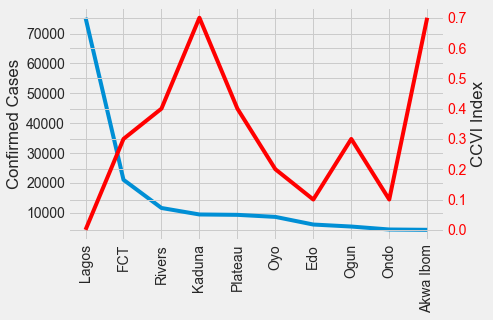

In [33]:
fig = plt.figure()
ax1 = fig.add_subplot()
ax1.plot(new_df1['states'], new_df1['No. of Cases (Lab Confirmed)'])
plt.xticks(rotation=90)
ax1.set_ylabel('Confirmed Cases')


ax2 = ax1.twinx()
ax2.plot(new_df1['states'], new_df1['Overall CCVI Index'], 'r')
ax2.set_ylabel('CCVI Index')
for l in ax2.get_yticklabels():
    l.set_color('r')



TODO H - Determine the relationship between the external dataset and the NCDC COVID-19 dataset. 
Here you will generate a line plot of top 10 confirmed cases and the overall community vulnerability index on the same axis. From the graph, explain your observation.
<br>
Steps
* Combine the two dataset together on a common column(states)
* Create a new dataframe for plotting. This DataFrame will contain top 10 states in terms of confirmed cases i.e sort by confirmed cases. ** Hint: Check out Pandas [nlargest](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nlargest.html) function. This [tutorial](https://cmdlinetips.com/2019/03/how-to-select-top-n-rows-with-the-largest-values-in-a-columns-in-pandas/) can help out ** 
* Plot both variable on the same axis. Check out this [tutorial](http://kitchingroup.cheme.cmu.edu/blog/2013/09/13/Plotting-two-datasets-with-very-different-scales/)

<AxesSubplot:xlabel='Population Density', ylabel='No. of Cases (Lab Confirmed)'>

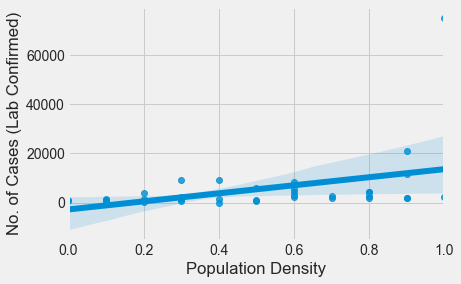

In [34]:
sns.regplot(y='No. of Cases (Lab Confirmed)', x='Population Density', data=new_df)

TODO I - Determine the relationship between the external dataset and the NCDC COVID-19 dataset. 
* Here you will generate a regression plot between two variables to visualize the linear relationships - Confirmed Cases and Population Density.
Hint: Check out Seaborn [Regression Plot](https://seaborn.pydata.org/generated/seaborn.regplot.html).
* Provide a summary of your observation

TODO J - 
* Provide more analyses by extending TODO G & H. Meaning, determine relationships between more features.
* Provide a detailed summary of your findings. 
* Note that you can have as many as possible.

In [35]:
df.describe()

,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
count,37.000000,37.000000,37.000000,37.00000
mean,5406.945946,235.162162,5100.513514,71.27027
std,12494.120144,428.206305,12003.659423,112.85454
min,5.000000,0.000000,3.000000,2.00000
25%,1155.000000,24.000000,1014.000000,24.00000
50%,2173.000000,64.000000,2057.000000,35.00000
75%,4236.000000,301.000000,3857.000000,79.00000
max,75324.000000,2310.000000,72350.000000,664.00000


Checking for the relationship between confirmed cases and vulnerability index data

<AxesSubplot:xlabel='Age', ylabel='No. of Cases (Lab Confirmed)'>

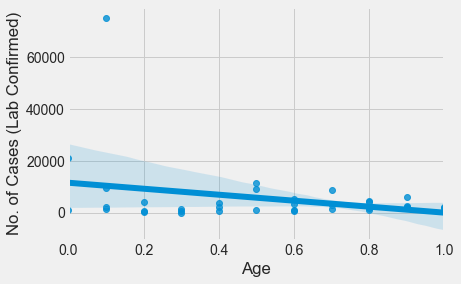

In [36]:
#ind = ['Age', 'Fragility', 'Health system', 'Socio-Economic', 'Acute IHR']

sns.regplot(y='No. of Cases (Lab Confirmed)', x='Age', data=new_df)

<AxesSubplot:xlabel='Fragility', ylabel='No. of Cases (Lab Confirmed)'>

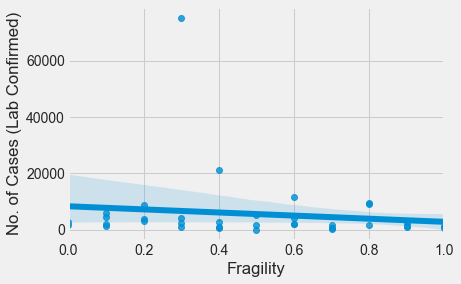

In [37]:
sns.regplot(y='No. of Cases (Lab Confirmed)', x='Fragility', data=new_df)

<AxesSubplot:xlabel='Health System', ylabel='No. of Cases (Lab Confirmed)'>

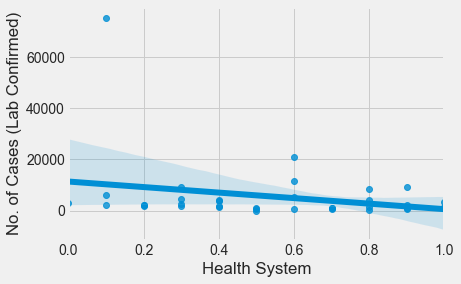

In [38]:
sns.regplot(y='No. of Cases (Lab Confirmed)', x='Health System', data=new_df)

<AxesSubplot:xlabel='Socio-Economic', ylabel='No. of Cases (Lab Confirmed)'>

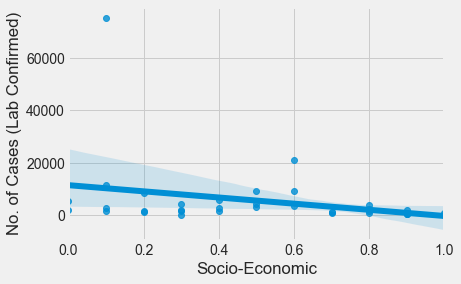

In [39]:
sns.regplot(y='No. of Cases (Lab Confirmed)', x='Socio-Economic', data=new_df)

<AxesSubplot:xlabel='Acute IHR', ylabel='No. of Cases (Lab Confirmed)'>

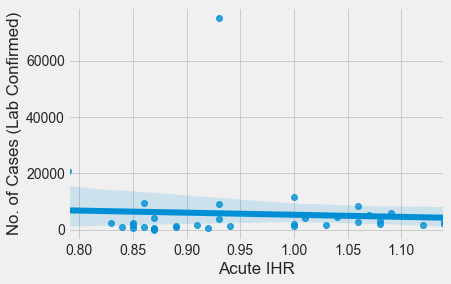

In [40]:
sns.regplot(y='No. of Cases (Lab Confirmed)', x='Acute IHR', data=new_df)

### TODO L - 
Determine the effect of the Pandemic on the economy. To do this, you will compare the Real GDP value Pre-COVID-19 with Real GDP in 2020 (COVID-19 Period, especially Q2 2020)
<br>
Steps
* From the Real GDP Data, generate a `barplot` using the GDP values for each year & quarters. For example: On x-axis you will have year 2017 and the bars will be values of each quarters(Q1-Q4). You expected to have subplots of each quarters on one graph.
<br>
Hint: Use [Pandas.melt](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) to create your plot DataFrame 
* Set your quarter legend to lower left.
* Using `axhline`, draw a horizontal line through the graph at the value of Q2 2020.
* Write out your observation

In [41]:
gdp

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59
5,2019,16434552.65,16931434.89,18494114.17,19530000.00
6,2020,16740000.00,15890000.00,17820000.00,0.00


In [42]:
gdp['Year'] = pd.to_datetime(gdp['Year'], format='%Y')

In [43]:
gdp['Year'] = gdp['Year'].dt.year

In [44]:
gdp_new = pd.melt(gdp, id_vars=['Year'], var_name='Quarters', value_name='Real GDP')
gdp_new

,Year,Quarters,Real GDP
0,2014,Q1,15438679.50
1,2015,Q1,16050601.38
2,2016,Q1,15943714.54
3,2017,Q1,15797965.83
4,2018,Q1,16096654.19
5,2019,Q1,16434552.65
6,2020,Q1,16740000.00
7,2014,Q2,16084622.31
8,2015,Q2,16463341.91
9,2016,Q2,16218542.41


In [45]:
gdp_new.groupby('Year')['Real GDP'].min()

Year
2014    15438679.50
2015    16050601.38
2016    15943714.54
2017    15797965.83
2018    16096654.19
2019    16434552.65
2020           0.00
Name: Real GDP, dtype: float64

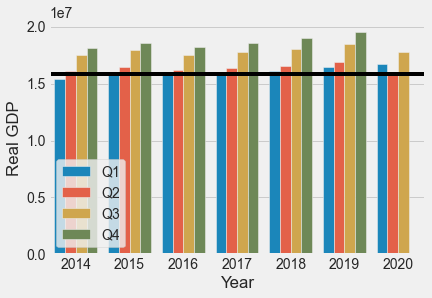

In [46]:
sns.barplot(x='Year', y='Real GDP', data=gdp_new, hue='Quarters')
plt.axhline(y=15890000.00, color="black")
plt.legend(loc="lower left")